<a href="https://colab.research.google.com/github/dianaulloa18/Modelado-de-una-radio-base-de-telefon-a-m-vil-3G-mediante-t-cnicas-de-Inteligencia-Artificial/blob/master/Eduardo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

# Cargar google drive en google Colab
from google.colab import drive

# Montar carpeta de google Drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [0]:
data = pd.read_excel('drive/My Drive/TFM/datos.xlsx')


In [0]:
data.head(20)

,Time,RNC,NodeB Name,Cell Name,Cell ID,CS_TRAFFIC_Volume_GUL_NEW2,PS Traffic Volume_GUL (MB),PS Drop Call_GUL,HSDPA User Throughput_GUL,HSUPA User Throughput_GUL,VS.RAC.DL.EqvUserNum,VS.RAC.UL.EqvUserNum,VS.MeanRTWP(dBm),VS.MeanRTWP(dBm).1,IRAT HO Success Rate 3G to 2G_GUL,Soft HO Success Rate_GUL,VS.ULBler.AMR(%),VS.RAB.SuccEstabCS.AMR,Multi-RAB_Call_Setup_Success_Rate_ECU,VS.RAB.AttEstab.AMR,RRC.SuccConnEstab.OrgConvCall,RRC.SuccConnEstab.TmConvCall,RRC.AttConnEstab.OrgConvCall,RRC.AttConnEstab.TmConvCall,RRC.SuccConnEstab.OrgBkgCall,RRC.SuccConnEstab.OrgInterCall,RRC.SuccConnEstab.TmBkgCall,RRC.AttConnEstab.OrgBkgCall,RRC.AttConnEstab.OrgInterCall,VS.RAB.SuccEstabPS.Bkg,VS.RAB.SuccEstabPS.Int,VS.RAB.AttEstabPS.Bkg,VS.RAB.AttEstabPS.Int,VS.RAB.NormRel.AMR,VS.RAB.AbnormRel.PS,VS.RAB.AbnormRel.PS.PCH,VS.RAB.AbnormRel.PS.D2P,VS.RAB.NormRel.PS,VS.RAB.NormRel.PS.PCH,VS.DCCC.Succ.F2U,VS.DCCC.Succ.D2U,VS.RRC.Paging1.Loss.PCHCong.Cell,VS.HSDPA.64QAM.UE.Mean.Cell,CNBAP,VS.TP.UE.0,VS.TP.UE.1,VS.TP.UE.2,VS.TP.UE.3,VS.TP.UE.4,VS.TP.UE.6.9,VS.TP.UE.10.15,ECU_PS_RAB_Setup_Success_Ratio,ECU_HSDPA_RAB_Setup_Success_Ratio,RRC.AttConnEstab.TmBkgCall,HSDPA 64QAM RAB Setup Success Rate (Cell)(%),VS.HSDPA.RAB.64QAM.AttEstab,VS.HSDPA.RAB.64QAM.SuccEstab,HSDPA Users,ECU_PS_RRC_Setup_Success_Ratio,VS.LC.DLCreditUsed.Mean,VS.LC.ULCreditUsed.Mean,VS.HSUPA.MeanChThroughput.TotalBytes(byte),VS.CellDCHUEs,VS.HSUPA.UE.Mean.Cell,DCH User Num,CS Traffic Volume_GUL,TRAFFIC_RETENTION_ECU,VS.HSDPA.MeanChThroughput(kbit/s),VS.HSUPA.MeanChThroughput(kbit/s),MultiRAB Setup SuccRate_DEN,MultiRAB Setup SuccRate_NUM,Paging Loss by Cell_GUL,VS.HSDPA.DC.PRIM.UE.Mean.Cell,VS.HSDPA.DC.SEC.UE.Mean.Cell,VS.U2L.FastReturn.Redirect.CSFBUE,VS.HSUPA.UE.Mean.TTI10ms,VS.HSUPA.UE.Mean.TTI2ms,CS Drop Call_GUL
0,2019-07-08,RNCO04,CAROLINAW08,CAROLINAE,50135,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0,100,0.0,0.0000,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0,0,0,0,0,0,0,0.0,0.0,0,0.0,0,0,0.0000,0.00,0.0000,0.0000,0,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0,0,0.0,0.0000,0.0000,0,0.0000,0.0000,0.0
1,2019-07-08,RNCO04,CAROLINAW08,CAROLINAZ,15139,0.1333,64792.0000,0.0,16450085.0,1818933.0,10222.0000,27146.0000,-1043608.0,-1043608,100,100.0,0.7000,4,100.0,4,2,2,2,2,1,0,0,1,0,14,0,14,0,5,0,0,0,15,7,207,32,0,0.2806,0.2194,12,41,9,4,0,0,0,1.0,1.0,0,100.0,11,11,0.3542,1.00,0.8431,31972.0000,3460520,0.9931,0.6667,0.9931,0.1333,100.0,16450085.0,1818933.0,3,3,0.0,0.0000,0.0000,5,10639.0000,0.2695,0.0
2,2019-07-08,RNCO04,CAROLINAW08,CAROLINAX,15137,0.0333,0.7773,0.0,5652183.0,3394545.0,0.0697,0.1692,-1060067.0,-1060067,100,966667.0,0.0667,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,0,0.0417,0.0142,0,2,0,0,0,0,0,0.0,0.0,0,0.0,0,0,0.0264,0.00,0.0292,0.1000,1867000,0.0500,0.0333,0.0500,0.0333,100.0,5652183.0,3394545.0,0,0,0.0,0.0000,0.0000,1,0.0278,0.0389,0.0
3,2019-07-08,RNCO04,CAROLINAW08,CAROLINAY,15138,1.3500,17111.0000,0.0,1070702.0,8098648.0,18217.0000,33554.0000,-1031639.0,-1031639,100,100.0,0.0692,2,100.0,2,2,0,2,0,2,0,1,2,0,11,0,11,0,3,0,0,0,10,3,46,18,0,10833.0000,0.1211,0,2,31,2,0,0,0,1.0,1.0,1,100.0,10,10,0.5417,1.00,0.8514,49056.0000,32667920,10292.0000,0.7847,10292.0000,1.3500,100.0,1070702.0,8098648.0,1,1,0.0,0.0000,0.0000,3,13694.0000,0.2000,0.0
4,2019-07-08,RNCO04,CAROLINAW08,CAROLINAG,41571,0.3500,0.1396,0.0,4026316.0,245948.0,0.1390,0.3941,-1055011.0,-1055011,100,100.0,0.8500,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,110,2,0,0.0806,0.0167,0,0,0,0,0,0,0,0.0,0.0,0,0.0,0,0,0.0417,0.00,0.1861,0.4889,58720,0.2264,0.0445,0.2264,0.3500,0.0,4026316.0,245948.0,0,0,0.0,0.0306,0.0042,0,0.0278,0.0611,0.0
5,2019-07-08,RNCO04,SHYRISW08,SHYRISB,52568,0.0000,0.4119,0.0,6322708.0,511043.0,0.0161,0.5048,-1062104.0,-1062104,100,100.0,0.0000,0,0.0,0,0,0,0,0,2,0,0,2,0,2,0,2,0,0,0,0,0,0,0,8,4,0,0.0362,0.0306,2,0,0,0,0,0,0,1.0,1.0,0,100.0,2,2,0.0181,1.00,0.0989,0.5876,811920,0.1211,0.1114,0.1211,0.0000,0.0,6322708.0,511043.0,0,0,0.0,0.0139,0.0459,0,0.1253,0.0974,0

In [0]:
data[['PS Traffic Volume_GUL (MB)','VS.RAC.UL.EqvUserNum','VS.RAC.DL.EqvUserNum']].describe()

,PS Traffic Volume_GUL (MB),VS.RAC.UL.EqvUserNum,VS.RAC.DL.EqvUserNum
count,2.108400e+04,21084.000000,21084.000000
mean,4.749643e+05,86216.887786,33558.809784
std,8.669119e+05,142045.548463,70838.442049
min,0.000000e+00,0.000000,0.000000
25%,5.315750e-01,0.498475,0.055775
50%,8.145250e+04,21640.000000,0.573350
75%,5.724178e+05,100689.500000,32069.250000
max,1.488424e+07,896248.000000,568616.000000


In [0]:
data[['PS Traffic Volume_GUL (MB)','VS.RAC.UL.EqvUserNum','VS.RAC.DL.EqvUserNum']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21084 entries, 0 to 21083
Data columns (total 3 columns):
PS Traffic Volume_GUL (MB)    21084 non-null float64
VS.RAC.UL.EqvUserNum          21084 non-null float64
VS.RAC.DL.EqvUserNum          21084 non-null float64
dtypes: float64(3)
memory usage: 494.2 KB


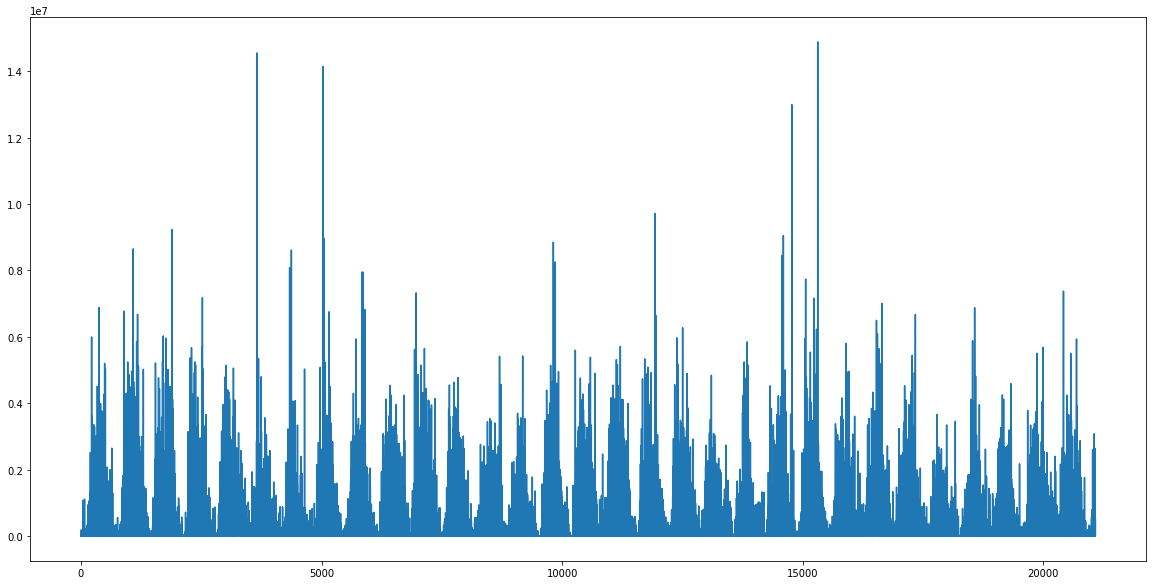

In [0]:

plt.figure(figsize=[20,10])
plt.plot(data['PS Traffic Volume_GUL (MB)'])


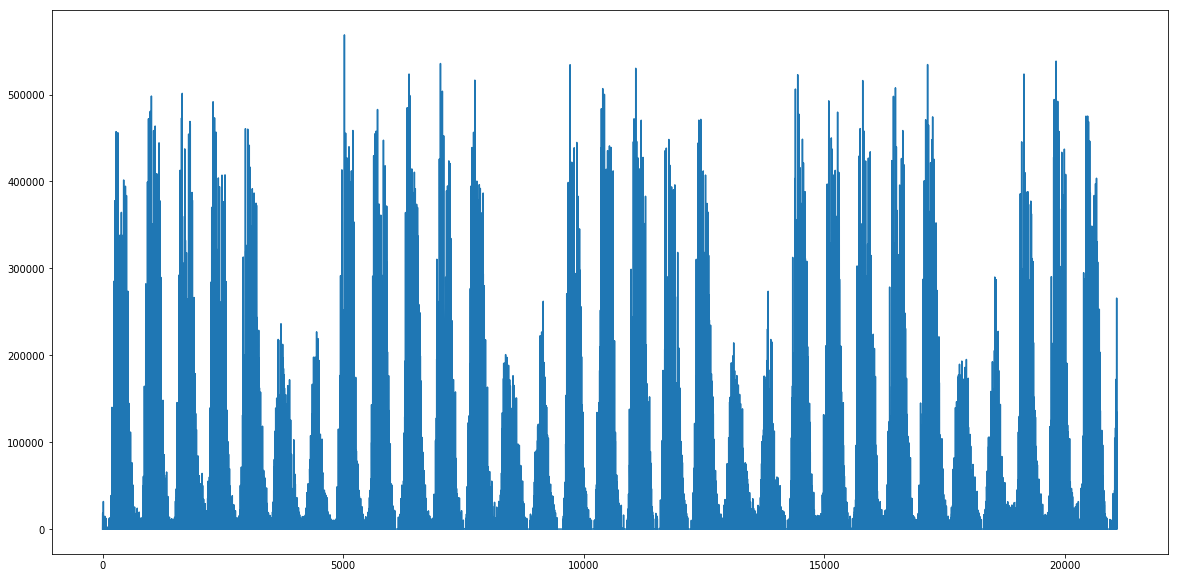

In [0]:

plt.figure(figsize=[20,10])
plt.plot(data['VS.RAC.DL.EqvUserNum'])

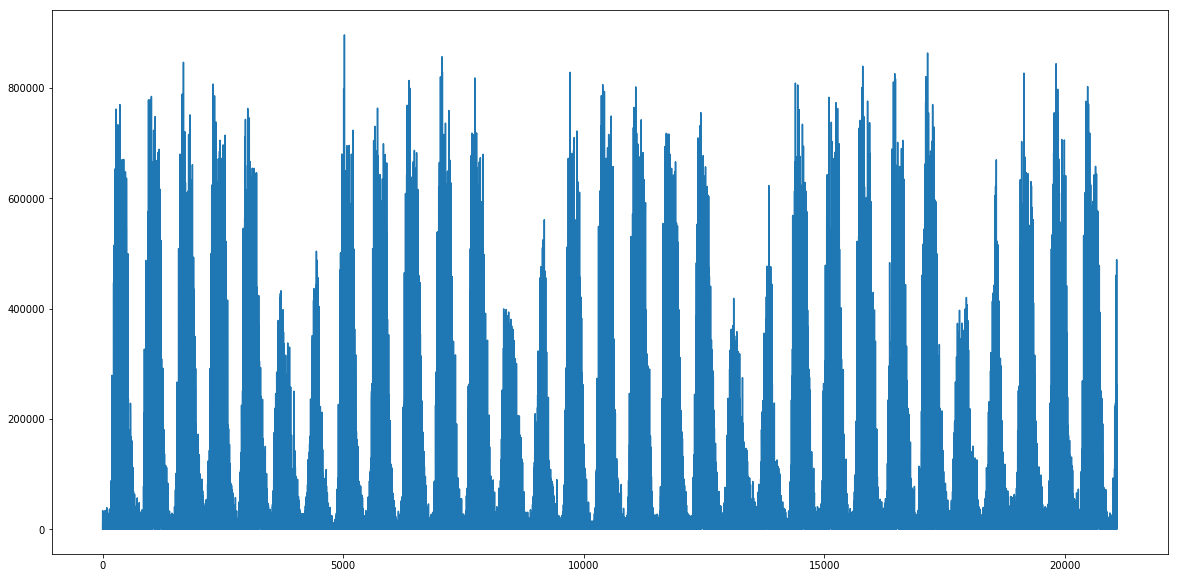

In [0]:

plt.figure(figsize=[20,10])
plt.plot(data['VS.RAC.UL.EqvUserNum'])


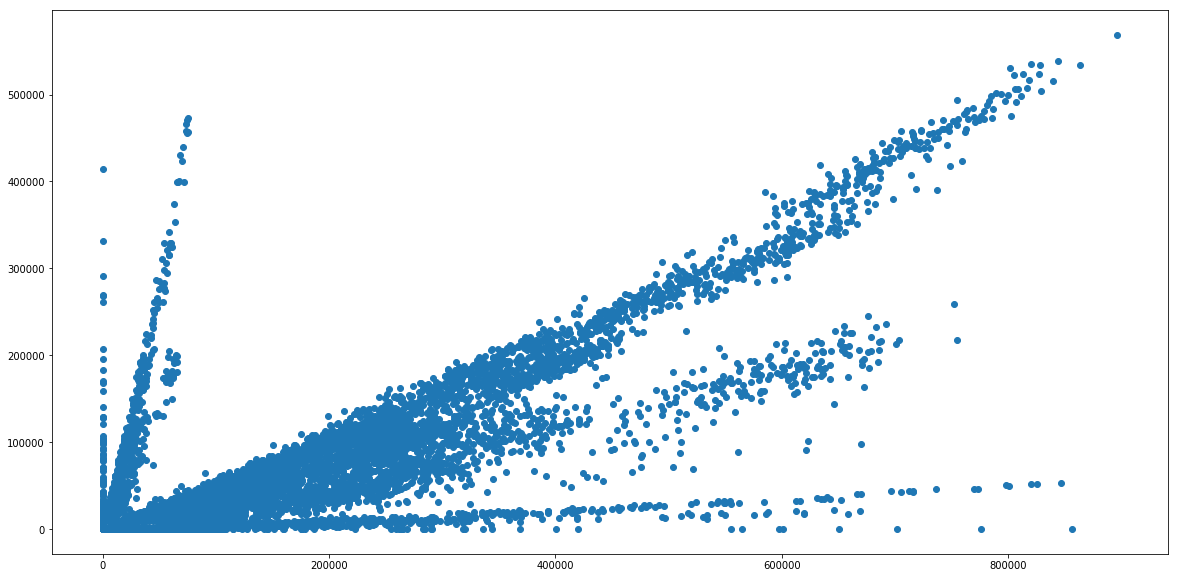

In [0]:

plt.figure(figsize=[20,10])
plt.scatter(data['VS.RAC.UL.EqvUserNum'],data['VS.RAC.DL.EqvUserNum'])


In [0]:
corrMatt = data.corr()

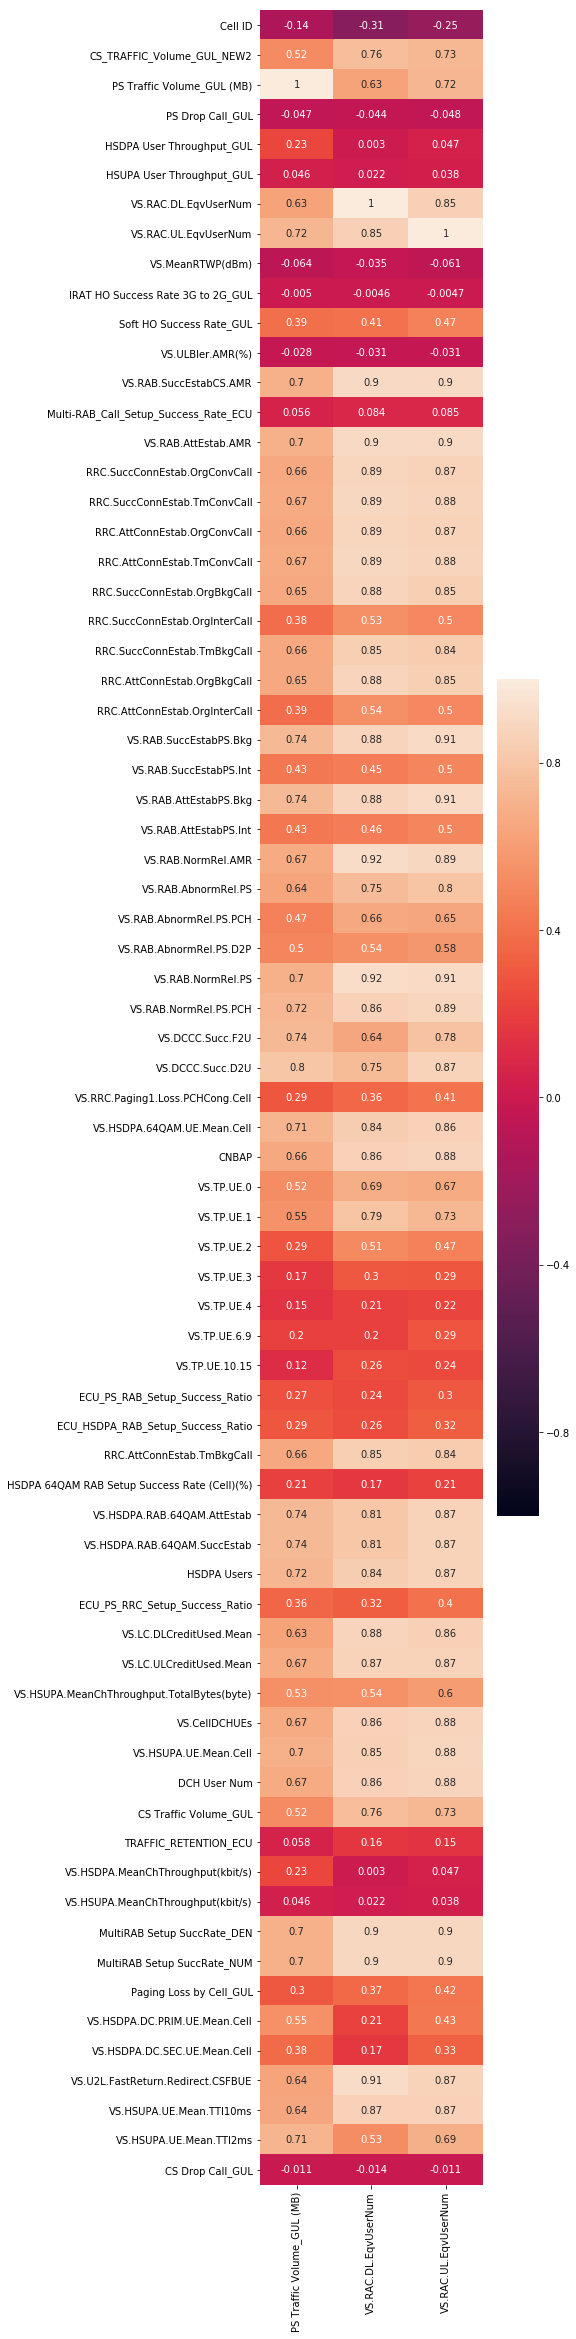

In [0]:
fig,ax= plt.subplots()
fig.set_size_inches(5,40)
sns.heatmap(corrMatt[['PS Traffic Volume_GUL (MB)','VS.RAC.DL.EqvUserNum','VS.RAC.UL.EqvUserNum']],vmax=1,vmin=-1, square=False,annot=True)



## Modelos

In [0]:
from sklearn.tree import DecisionTreeRegressor # Importamos las librerías necesarias 
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

## Variable ps trafic mb

In [0]:
# Las variables que mayor correlacion tienen 

n_index = corrMatt['Cell ID'].iloc[np.where(corrMatt[['PS Traffic Volume_GUL (MB)']]>=0.72)[0]].index



In [0]:
# Con todos los datos

X_train, X_test, y_train, y_test = train_test_split(data[n_index[1::]],data['PS Traffic Volume_GUL (MB)'], test_size=0.10, random_state=42,shuffle=True)

In [0]:
np.shape(data['PS Traffic Volume_GUL (MB)'])

(21084,)

In [0]:
20300/21084

0.9628154050464808

In [0]:
# sin considerar outliers presentes cerca de los maximos
# que son alrededor de 203 datos es decir el 4% de todos los datos

np.shape(np.where(data['PS Traffic Volume_GUL (MB)']>0.4e7))

(1, 203)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data[n_index[1::]].iloc[np.where(data['PS Traffic Volume_GUL (MB)']<0.4e7)],
                                                    data['PS Traffic Volume_GUL (MB)'].iloc[np.where(data['PS Traffic Volume_GUL (MB)']<0.4e7)], 
                                                    test_size=0.20, random_state=42,shuffle=True)

In [0]:
# Normalización de las variables


MMS = MinMaxScaler()

train = MMS.fit_transform(X_train)
test = MMS.fit_transform(X_test)


out_train = MMS.fit_transform(np.array(y_train).reshape(-1,1))
out_test = MMS.fit_transform(np.array(y_test).reshape(-1,1))



### Arboles de desicion

In [0]:
rtree = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.01,
                              min_samples_split=0.1)
rtree.fit(train,out_train)

rsal = rtree.predict(test)    # Obtenemos las salidas del modelo para datos de
                                # test
  
E1test = r2_score(out_test,rsal)

print('El r2 score para los datos de testeo es de:',
      r2_score(out_test,rsal))    # mediante el r2 score validamos la precision 
                               # del modelo, se obtiene un valor para
                               # datos de test

El r2 score para los datos de testeo es de: 0.6891097048890115


In [0]:
cros_val_score

### Redes Neuronales

In [0]:
# creamos el modelo de la RNA base
clf = MLPRegressor(hidden_layer_sizes=([150,200]),activation='identity',max_iter=100000, alpha=0.1, solver='lbfgs',
                   tol=0.00001, learning_rate_init=0.001)


# Realizamos el entrenamiento del modelo 
model = clf.fit(train,out_train)


output = model.predict(test)



E2test = r2_score(out_test,output)

E2test

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6973766607330559

In [0]:
#metrica con respecto a los datos de train
output1 = model.predict(train)


r2_score(out_train,output1)


0.6842999878506556

### Random Forest

In [0]:


# max_depth = número máximo de niveles en cada árbol de decisión
# max_features = número máximo de funciones consideradas para dividir un nodo
# min_samples_leaf = número mínimo de puntos de datos permitidos en un nodo hoja
# min_samples_split = número mínimo de puntos de datos colocados en un nodo antes de dividir el nodo
# n_estimators = número de árboles en el foreset

parametros = {'bootstrap': [True],
    'max_depth': [80, 90, 100], # 110
    'max_features': [2, 3, 5],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]#, 1000
}


# n_jobs = Numero de trabajos en paralelo, -1 usa todos los procesadores.
# cv = Determina la estrategia de división de validación cruzada - KFOLD
# verbose = Controla la verbosidad: cuanto más alto, más mensajes
rf = RandomForestRegressor()



# Iniciamos el grid search

grid_search = GridSearchCV(estimator = rf, 
                           param_grid = parametros, 
                           cv = 3, 
                           n_jobs = -1, 
                           verbose = 2)

In [0]:
# Fit the grid search to the data
grid_search.fit(train, out_train)
# Visualizamos los mejores parametros, luego de la validación cruzada.
grid_search.best_params_

Fitting 3 folds for each of 243 candidates, totalling 729 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 26.0min
[Parallel(n_jobs=-1)]: Done 729 out of 729 | elapsed: 31.2min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'bootstrap': True,
 'max_depth': 90,
 'max_features': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 300}

In [0]:
best_grid = grid_search.best_estimator_

predictions = best_grid.predict(test)

r2_score(out_test,predictions)



0.7187098355993082

In [0]:
#Usando los mejores parametros y luego de realizar un ajuste fino final

regressor = RandomForestRegressor()


regressor = RandomForestRegressor(bootstrap=True,
                                 max_depth=200,
                                 max_features=2,
                                 min_samples_leaf=7,
                                 min_samples_split=12,
                                 n_estimators=400)
regressor.fit(train, out_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=200,
                      max_features=2, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=7, min_samples_split=12,
                      min_weight_fraction_leaf=0.0, n_estimators=400,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
predictions = regressor.predict(test)

r2_score(out_test,predictions)


0.7185244083067991

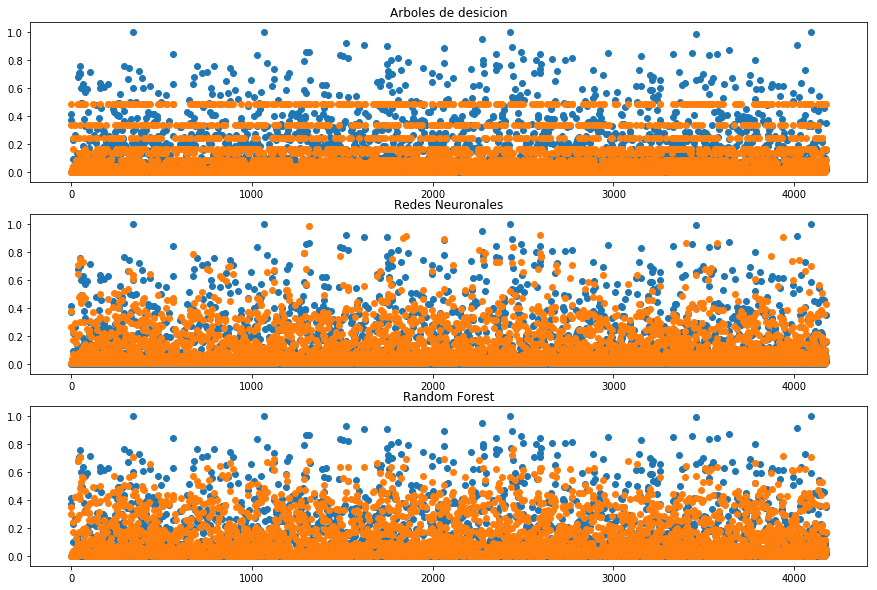

In [0]:
plt.figure(figsize=[15,10])
plt.subplot(311)
plt.scatter(range(len(out_test)),out_test)
plt.scatter(range(len(rsal)),rsal)
plt.title('Arboles de decision')


plt.subplot(312)
plt.scatter(range(len(out_test)),out_test)
plt.scatter(range(len(output)),output)
plt.title('Redes Neuronales')



plt.subplot(313)
plt.scatter(range(len(out_test)),out_test)
plt.title('Random Forest')
plt.scatter(range(len(predictions)),predictions)




## variable 'VS.RAC.DL.EqvUserNum'

In [0]:
# Se seleecionan las variables con una correlación mayor a 0.8

n_index_DL = corrMatt['Cell ID'].iloc[np.where(corrMatt[['VS.RAC.DL.EqvUserNum']]>=0.8)[0]].index


In [0]:
X_train_DL, X_test_DL, y_train_DL, y_test_DL = train_test_split(data[n_index_DL[1::]],data['VS.RAC.DL.EqvUserNum'],
                                                                test_size=0.20, random_state=42,shuffle=True)

In [0]:
# Normalizacion de los datos

MMS = MinMaxScaler()

train_DL = MMS.fit_transform(X_train_DL)
test_DL = MMS.fit_transform(X_test_DL)


out_train_DL = MMS.fit_transform(np.array(y_train_DL).reshape(-1,1))
out_test_DL = MMS.fit_transform(np.array(y_test_DL).reshape(-1,1))

### Arboles de decision

In [0]:
rtree = DecisionTreeRegressor(max_depth=5, min_samples_leaf=0.03,
                              min_samples_split=0.01)
rtree.fit(train_DL,out_train_DL)

rsal = rtree.predict(test_DL)    # Obtenemos las salidas del modelo para datos de
                                 # test
  
E1test=r2_score(out_test_DL,rsal)

print('El r2 score para los datos de testeo es de:',
      r2_score(out_test_DL,rsal))    # mediante el r2 score validamos la precision 
                               # del modelo, se obtiene un valor para
                               # datos de test

El r2 score para los datos de testeo es de: 0.8324425441778565


### Redes Neuronales



In [0]:
# creamos el modelo de la RNA base
clf = MLPRegressor(hidden_layer_sizes=([100,75]),activation='identity',max_iter=100000, alpha=0.1, solver='lbfgs',
                   tol=0.00001, learning_rate_init=0.001)


# Realizamos el entrenamiento del modelo 
model = clf.fit(train_DL,out_train_DL)

output = model.predict(test_DL)

E2test = r2_score(out_test_DL,output)

E2test

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.889571936905036

### Random Forest

In [0]:
parametros = {'bootstrap': [True],
    'max_depth': [80, 90, 100], # 110
    'max_features': [2, 3, 5],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]#, 1000
}

# Create a based model
# n_jobs = Numero de trabajos en paralelo, -1 usa todos los procesadores.
# cv = Determina la estrategia de división de validación cruzada - KFOLD
# verbose = Controla la verbosidad: cuanto más alto, más mensajes
rf_DL = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_DL, 
                           param_grid = parametros, 
                           cv = 3, 
                           n_jobs = -1, 
                           verbose = 2)

In [0]:
# Fit the grid search to the data
grid_search.fit(train_DL, out_train_DL)
# Visualizamos los mejores parametros, luego de la validación cruzada.
grid_search.best_params_

Fitting 3 folds for each of 243 candidates, totalling 729 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   59.2s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 23.0min
[Parallel(n_jobs=-1)]: Done 729 out of 729 | elapsed: 27.4min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 100}

In [0]:
best_grid = grid_search.best_estimator_

predictions = best_grid.predict(test_DL)

r2_score(out_test_DL,predictions)

0.892450079582108

In [0]:
# Usando los mejores parametros 

regressor = RandomForestRegressor()


regressor = RandomForestRegressor(bootstrap=True,
                                 max_depth=100,
                                 max_features=3,
                                 min_samples_leaf=4,
                                 min_samples_split=8,
                                 n_estimators=200)
regressor.fit(train_DL, out_train_DL)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
                      max_features=3, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=8,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
predictions = regressor.predict(test_DL)

r2_score(out_test_DL,predictions)


0.8913755601213852

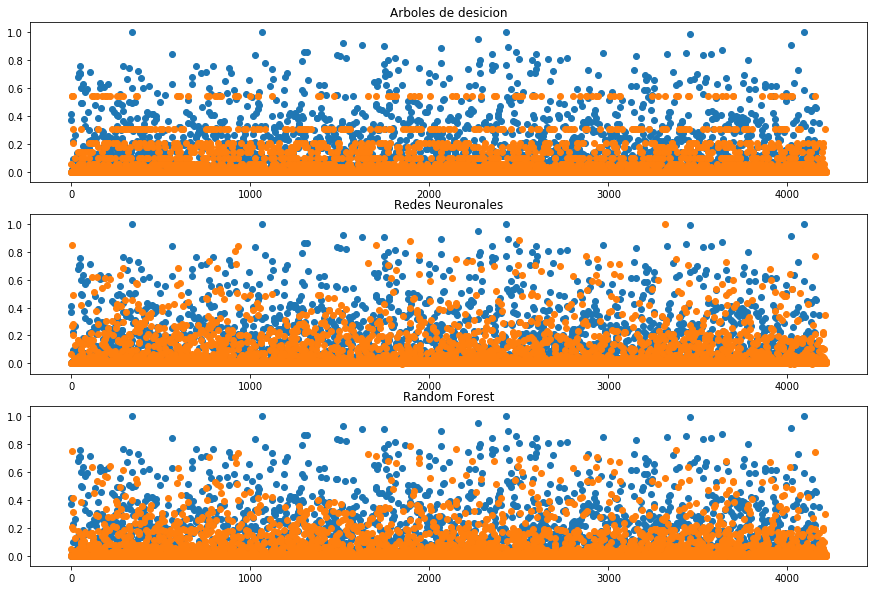

In [0]:
plt.figure(figsize=[15,10])
plt.subplot(311)
plt.scatter(range(len(out_test)),out_test)
plt.scatter(range(len(rsal)),rsal)
plt.title('Arboles de decision')


plt.subplot(312)
plt.scatter(range(len(out_test)),out_test)
plt.scatter(range(len(output)),output)
plt.title('Redes Neuronales')



plt.subplot(313)
plt.scatter(range(len(out_test)),out_test)
plt.title('Random Forest')
plt.scatter(range(len(predictions)),predictions)


### Variable 'VS.RAC.UL.EqvUserNum'

In [0]:
# Se seleecionan las variables con una correlación mayor a 0.8

n_index_UL = corrMatt['Cell ID'].iloc[np.where(corrMatt[['VS.RAC.UL.EqvUserNum']]>=0.8)[0]].index


In [0]:
X_train_UL, X_test_UL, y_train_UL, y_test_UL = train_test_split(data[n_index_DL[1::]],data['VS.RAC.UL.EqvUserNum'],
                                                                test_size=0.20, random_state=42,shuffle=True)

In [0]:
# Normalizacion de los datos

MMS = MinMaxScaler()

train_UL = MMS.fit_transform(X_train_UL)
test_UL = MMS.fit_transform(X_test_UL)


out_train_UL = MMS.fit_transform(np.array(y_train_UL).reshape(-1,1))
out_test_UL = MMS.fit_transform(np.array(y_test_UL).reshape(-1,1))



### Arboles de decision

In [0]:
rtree = DecisionTreeRegressor(max_depth=9, min_samples_leaf=0.03,
                              min_samples_split=0.01)
rtree.fit(train_UL,out_train_UL)

rsal = rtree.predict(test_UL)    # Obtenemos las salidas del modelo para datos de
                                 # test
  
E1test=r2_score(out_test_UL,rsal)

print('El r2 score para los datos de testeo es de:',
      r2_score(out_test_UL,rsal))    # mediante el r2 score validamos la precision 
                               # del modelo, se obtiene un valor para
                               # datos de test

El r2 score para los datos de testeo es de: 0.9710786186949242


### Redes Neuronales



In [0]:
# creamos el modelo de la RNA base
clf = MLPRegressor(hidden_layer_sizes=([100,75]),activation='identity',max_iter=100000, alpha=0.1, solver='lbfgs',
                   tol=0.00001, learning_rate_init=0.001)


# Realizamos el entrenamiento del modelo 
model = clf.fit(train_UL,out_train_UL)

output = model.predict(test_UL)

E2test = r2_score(out_test_UL,output)

E2test

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9995705387749143

### Random Forest

In [0]:
parametros = {'bootstrap': [True],
    'max_depth': [80, 90, 100], # 110
    'max_features': [2, 3, 5],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]#, 1000
}

# Create a based model
# n_jobs = Numero de trabajos en paralelo, -1 usa todos los procesadores.
# cv = Determina la estrategia de división de validación cruzada - KFOLD
# verbose = Controla la verbosidad: cuanto más alto, más mensajes
rf_UL = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_UL, 
                           param_grid = parametros, 
                           cv = 3, 
                           n_jobs = -1, 
                           verbose = 2)

In [0]:
# Fit the grid search to the data
grid_search.fit(train_UL, out_train_UL)
# Visualizamos los mejores parametros, luego de la validación cruzada.
grid_search.best_params_

Fitting 3 folds for each of 243 candidates, totalling 729 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 23.0min
[Parallel(n_jobs=-1)]: Done 729 out of 729 | elapsed: 27.3min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'bootstrap': True,
 'max_depth': 100,
 'max_features': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 100}

In [0]:
best_grid = grid_search.best_estimator_

predictions = best_grid.predict(test_UL)

r2_score(out_test_UL,predictions)

0.9888212820983149

In [0]:
# Usando los mejores parametros 

regressor = RandomForestRegressor()


regressor = RandomForestRegressor(bootstrap=True,
                                 max_depth=80,
                                 max_features=5,
                                 min_samples_leaf=3,
                                 min_samples_split=12,
                                 n_estimators=100)
regressor.fit(train_UL, out_train_UL)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=80,
                      max_features=5, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=12,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
predictions = regressor.predict(test_UL)

r2_score(out_test_UL,predictions)


0.9897980146461824

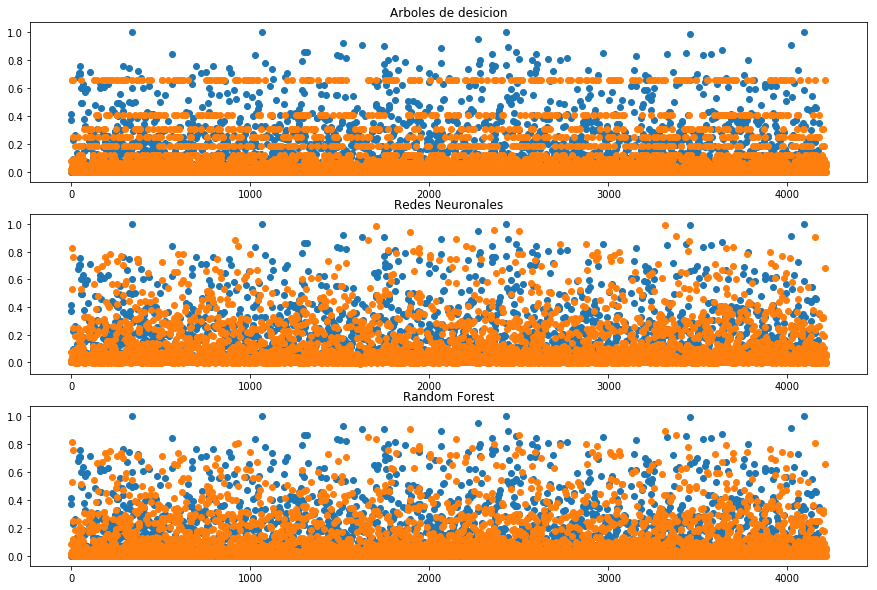

In [0]:
plt.figure(figsize=[15,10])
plt.subplot(311)
plt.scatter(range(len(out_test)),out_test)
plt.scatter(range(len(rsal)),rsal)
plt.title('Arboles de decision')


plt.subplot(312)
plt.scatter(range(len(out_test)),out_test)
plt.scatter(range(len(output)),output)
plt.title('Redes Neuronales')



plt.subplot(313)
plt.scatter(range(len(out_test)),out_test)
plt.title('Random Forest')
plt.scatter(range(len(predictions)),predictions)


### Modelo para estimar tres variables

In [0]:
# Mayores a 0.8 correlacion

n_index_all_1 = corrMatt['Cell ID'].iloc[np.where(corrMatt[['PS Traffic Volume_GUL (MB)','VS.RAC.UL.EqvUserNum','VS.RAC.DL.EqvUserNum']]>=0.7)[0]].index

In [0]:
n_index_all_1.unique()

Index(['CS_TRAFFIC_Volume_GUL_NEW2', 'PS Traffic Volume_GUL (MB)',
       'VS.RAC.DL.EqvUserNum', 'VS.RAC.UL.EqvUserNum',
       'VS.RAB.SuccEstabCS.AMR', 'VS.RAB.AttEstab.AMR',
       'RRC.SuccConnEstab.OrgConvCall', 'RRC.SuccConnEstab.TmConvCall',
       'RRC.AttConnEstab.OrgConvCall', 'RRC.AttConnEstab.TmConvCall',
       'RRC.SuccConnEstab.OrgBkgCall', 'RRC.SuccConnEstab.TmBkgCall',
       'RRC.AttConnEstab.OrgBkgCall', 'VS.RAB.SuccEstabPS.Bkg',
       'VS.RAB.AttEstabPS.Bkg', 'VS.RAB.NormRel.AMR', 'VS.RAB.AbnormRel.PS',
       'VS.RAB.NormRel.PS', 'VS.RAB.NormRel.PS.PCH', 'VS.DCCC.Succ.F2U',
       'VS.DCCC.Succ.D2U', 'VS.HSDPA.64QAM.UE.Mean.Cell', 'CNBAP',
       'VS.TP.UE.1', 'RRC.AttConnEstab.TmBkgCall',
       'VS.HSDPA.RAB.64QAM.AttEstab', 'VS.HSDPA.RAB.64QAM.SuccEstab',
       'HSDPA Users', 'VS.LC.DLCreditUsed.Mean', 'VS.LC.ULCreditUsed.Mean',
       'VS.CellDCHUEs', 'VS.HSUPA.UE.Mean.Cell', 'DCH User Num',
       'CS Traffic Volume_GUL', 'MultiRAB Setup SuccRate_DEN',
    

In [0]:
n_index_all = ['CS_TRAFFIC_Volume_GUL_NEW2',
       'VS.RAB.SuccEstabCS.AMR', 'VS.RAB.AttEstab.AMR',
       'RRC.SuccConnEstab.OrgConvCall', 'RRC.SuccConnEstab.TmConvCall',
       'RRC.AttConnEstab.OrgConvCall', 'RRC.AttConnEstab.TmConvCall',
       'RRC.SuccConnEstab.OrgBkgCall', 'RRC.SuccConnEstab.TmBkgCall',
       'RRC.AttConnEstab.OrgBkgCall', 'VS.RAB.SuccEstabPS.Bkg',
       'VS.RAB.AttEstabPS.Bkg', 'VS.RAB.NormRel.AMR', 'VS.RAB.AbnormRel.PS',
       'VS.RAB.NormRel.PS', 'VS.RAB.NormRel.PS.PCH', 'VS.DCCC.Succ.F2U',
       'VS.DCCC.Succ.D2U', 'VS.HSDPA.64QAM.UE.Mean.Cell', 'CNBAP',
       'VS.TP.UE.1', 'RRC.AttConnEstab.TmBkgCall',
       'VS.HSDPA.RAB.64QAM.AttEstab', 'VS.HSDPA.RAB.64QAM.SuccEstab',
       'HSDPA Users', 'VS.LC.DLCreditUsed.Mean', 'VS.LC.ULCreditUsed.Mean',
       'VS.CellDCHUEs', 'VS.HSUPA.UE.Mean.Cell', 'DCH User Num',
       'MultiRAB Setup SuccRate_DEN',
       'MultiRAB Setup SuccRate_NUM', 'VS.U2L.FastReturn.Redirect.CSFBUE',
       'VS.HSUPA.UE.Mean.TTI10ms', 'VS.HSUPA.UE.Mean.TTI2ms']

In [0]:
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
...     data[n_index_all[1::]],data[['PS Traffic Volume_GUL (MB)','VS.RAC.DL.EqvUserNum','VS.RAC.UL.EqvUserNum']], test_size=0.20, random_state=42,shuffle=True)


In [0]:
np.shape(X_train_all), np.shape(y_train_all)

((16867, 34), (16867, 3))

In [0]:
# Normalizacion de los datos

MMS = MinMaxScaler()

train_all = MMS.fit_transform(X_train_all)
test_all = MMS.fit_transform(X_test_all)


out_train_all = MMS.fit_transform(y_train_all)
out_test_all = MMS.fit_transform(y_test_all)



In [0]:
np.shape(out_train_all)

(16867, 3)

In [0]:
parametros = {'bootstrap': [True],
    'max_depth': [80, 90, 100], # 110
    'max_features': [2, 3, 5],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]#, 1000
}

# Create a based model
# n_jobs = Numero de trabajos en paralelo, -1 usa todos los procesadores.
# cv = Determina la estrategia de división de validación cruzada - KFOLD
# verbose = Controla la verbosidad: cuanto más alto, más mensajes
rf_all = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_all, 
                           param_grid = parametros, 
                           cv = 3, 
                           n_jobs = -1, 
                           verbose = 2)

In [0]:
# Fit the grid search to the data
grid_search.fit(X_train_all, y_train_all)
# Visualizamos los mejores parametros, luego de la validación cruzada.
grid_search.best_params_

Fitting 3 folds for each of 243 candidates, totalling 729 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 15.8min


In [0]:
best_grid = grid_search.best_estimator_

predictions = best_grid.predict(X_test_all)

r2_score(y_test_all,predictions)

In [0]:
regressor = RandomForestRegressor()


regressor = RandomForestRegressor(bootstrap=True,
                                 max_depth=100,
                                 max_features=3,
                                 min_samples_leaf=4,
                                 min_samples_split=7,
                                 n_estimators=300)

regressor.fit(train_all, out_train_all)



In [0]:
predictions = regressor.predict(test_all)

In [0]:
print('Para datos mb' , r2_score(out_test_all[:,0],predictions[:,0]),
      'Para datos DL' , r2_score(out_test_all[:,1],predictions[:,1]),
      'Para datos UL' , r2_score(out_test_all[:,2],predictions[:,2]))

### otros experimentos

In [0]:
np.shape(np.where(y_train>0.6e7))

In [0]:
from sklearn import datasets, linear_model

from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
from sklearn.preprocessing import MinMaxScaler


In [0]:
X_train, X_test, y_train, y_test = train_test_split(
...     data[n_index[1::]].iloc[np.where(data['PS Traffic Volume_GUL (MB)']<5.724178e+05)],data['PS Traffic Volume_GUL (MB)'].iloc[np.where(data['PS Traffic Volume_GUL (MB)']<5.724178e+05)], test_size=0.40, random_state=42)

In [0]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

In [0]:
MMS = MinMaxScaler()
#feat_x = MMS.fit_transform(data_quito[col_quito_traff_voz].iloc[np.where(data_quito['CS_TRAFFIC_Volume_GUL_NEW2']>0)])

train = MMS.fit_transform(X_train)
test = MMS.fit_transform(X_test)


#out = data_quito['CS_TRAFFIC_Volume_GUL_NEW2'].iloc[np.where(data_quito['CS_TRAFFIC_Volume_GUL_NEW2']>0)]

out_train = MMS.fit_transform(np.array(y_train).reshape(-1,1))

out_test = MMS.fit_transform(np.array(y_test).reshape(-1,1))

In [0]:
# creamos el modelo de la RNA base
clf = MLPRegressor(hidden_layer_sizes=([20,12]),activation='tanh',max_iter=100000, alpha=0.01, solver='lbfgs',
                   tol=0.00001, learning_rate_init=0.00001)


# Realizamos el entrenamiento del modelo 
model = clf.fit(train,out_train)



output = model.predict(test)




r2_score(out_test,output)

In [0]:
model = clf.fit(train,out_train)


output = model.predict(test)

r2_score(out_test,output)

In [0]:
plt.figure(figsize=[20,10])
plt.scatter(range(0,5000),out_train[0:5000])
plt.scatter(range(0,5000),output[0:5000],cmap='r')




In [0]:
k=['rbf', 'linear','poly','sigmoid']
c= range(1,100)
g=np.arange(1e-4,1e-2,0.0001)
g=g.tolist()
param_grid=dict(kernel=k, C=c, gamma=g)
print (param_grid)


model = SVR()

grid = GridSearchCV(model, param_grid, cv=5,scoring='accuracy')
grid.fit(feat_x, training_scores_encoded)  
print()
print("Grid scores on development set:")
print()  
print (grid.grid_scores_)  
print("Best parameters set found on development set:")
print()
print(grid.best_params_)
print("Grid best score:")
print()
print (grid.best_score_)
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print (grid_mean_scores)



In [0]:
from sklearn.svm import SVR # "Support vector classifier"

from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing


#lab_enc = preprocessing.LabelEncoder()
#training_scores_encoded = lab_enc.fit_transform(feat_x_dev)


model = SVR(kernel='rbf', C=1, gamma=0.1, epsilon=.1)


model.fit(feat_x, feat_x_dev)








In [0]:
from xgboost import XGBRegressor,XGBRFRegressor


In [0]:
regressor = XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=30,
                 min_child_weight=1.5,
                 n_estimators=1000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 


regressor.fit(train, out_train)


# Predicting a new result
y_pred = regressor.predict(test)

# Visualising the Decision Tree Regression results

r2_score(y_pred,out_test)


In [0]:
plt.figure(figsize=[20,10])
plt.scatter(range(0,5000),feat_x_test[0:5000])
plt.scatter(range(0,5000),y_pred[0:5000],cmap='r')

In [0]:
#for tuning parameters
parameters_for_testing = {
    'colsample_bytree':[0.4,0.6,0.8],
    'gamma':[0,0.03,0.1,0.3],
    'min_child_weight':[1.5,6,10],
    'learning_rate':[0.1,0.07],
    'max_depth':[3,5],
    'n_estimators':[10000],
    'reg_alpha':[1e-5, 1e-2,  0.75],
    'reg_lambda':[1e-5, 1e-2, 0.45],
    'subsample':[0.6,0.95]  
}

                    
xgb_model = XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5,
     min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=6, scale_pos_weight=1, seed=27)

gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=-1,iid=False, verbose=2,scoring='neg_mean_squared_error')
gsearch1.fit(train,out_train)
print (gsearch1.grid_scores_)
print('best params')
print (gsearch1.best_params_)
print('best score')
print (gsearch1.best_score_)


In [0]:

# Fitting Random Forest Regression model to the data set
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(feat_x, feat_x_dev)



In [0]:
# Predicting a new result
y_pred = regressor.predict(feat_test)

# Visualising the Decision Tree Regression results

r2_score(y_pred,feat_x_test)


In [0]:
plt.figure(figsize=[20,10])
plt.scatter(range(0,5000),feat_x_test[0:5000])
plt.scatter(range(0,5000),y_pred[0:5000],cmap='r')

In [0]:
X_grid = np.arange(min(feat_x), max(feat_x), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [0]:
yfit = model.predict(feat_test)

r2_score(feat_x_test,yfit)


In [0]:
plt.figure(figsize=[20,10])
plt.scatter(range(0,5000),feat_x_test[0:5000])
plt.scatter(range(0,5000),yfit[0:5000],cmap='r')



In [0]:
np.shape(y_train),np.shape(yfit)